# Histogram

Import Library

In [1]:
import numpy as np 
import imageio 
import matplotlib.pyplot as plt

Membaca Gambar

In [2]:
img = imageio.imread("ilham.jpg") # Membaca gambar

img_height = img.shape[0] # Mengambil ketinggian  
img_width = img.shape[1] # Mengambil lebar 
img_channel = img.shape[2] # Mengambil jumlah channel (warna) gambar

C:\Users\Asus\AppData\Local\Temp\ipykernel_3684\591231612.py:1: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img = imageio.imread("ilham.jpg") # Membaca gambar


Merubah gambar menjadi Grayscale

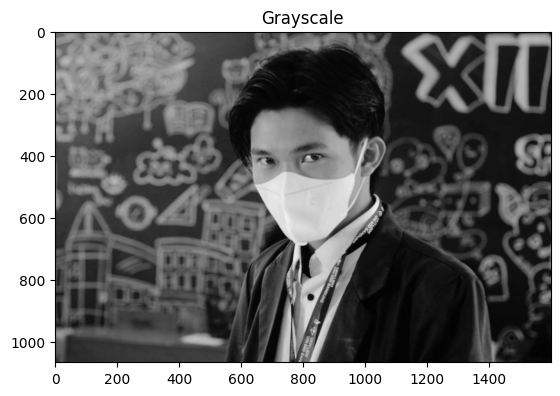

In [3]:
img_grayscale = np.zeros(img.shape, dtype=np.uint8) # Menginisialisasi variabel img_grayscale dengan nilai zero array yang memiliki ukuran sama dengan img dan tipe data uint8

for y in range(0, img_height): # Looping menjadi grayscale
    for x in range(0, img_width): # Looping iterasi
        # Mengambil nilai red, green, gray
        red = img[y][x][0] 
        green = img[y][x][1]
        blue = img[y][x][2]
        gray = (int(red) + int(green) + int(blue)) / 3 # Mencari nilai rata-rata 
        img_grayscale[y][x] = (gray, gray, gray) # Menyimpan nilai grayscale
        
plt.imshow(img_grayscale) # Menampilkan gambar
plt.title("Grayscale") # Memberi judul
plt.show() # Menampilkan gambar

# Menampilkan Histogram Gambar Grayscale

Membuat variabel untuk menyimpan data gambar

In [4]:
hg = np.zeros((256)) 

Mengisi setiap nilai dalam array hg dengan 0

In [5]:
for x in range(0, 256): # Mendefinisikan loop yang akan berjalan dari 0 hingga 255
    hg[x] = 0

Menghitung nilai dari gambar

In [6]:
for y in range(0, img_height): # Menginisialisasi loop untuk setiap baris gambar
    for x in range(0, img_width):
        gray = img_grayscale[y][x][0] # Mendapatkan nilai keabuan
        hg[gray] += 1 # Mengupdate nilai histogram

Menampilkan Histogram

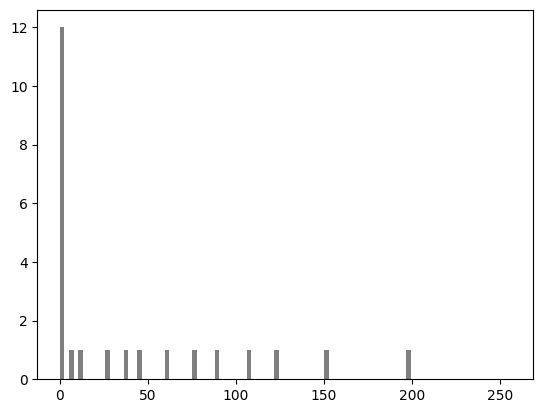

In [7]:
# plt.figure(figsize=(20, 6))
# plt.plot(hg, color="black", linewidth=2.0)
# plt.show()

bins = np.linspace(0, 256, 100)
plt.hist(hg, bins, color="black", alpha=0.5)
plt.show() #  Menampilkan gambar

# Menampilkan Histogram Gambar RGB

Membuat variabel untuk menyimpan data gambar

In [8]:
hgr = np.zeros((256)) 
hgg = np.zeros((256))
hgb = np.zeros((256))
hgrgb = np.zeros((768))

Mengisi setiap nilai dalam array hg dengan 0

In [9]:
for x in range(0, 256): # loop yang akan berjalan sebanyak 256 kali, dimulai dari 0 hingga 255
    hgr[x] = 0 
    hgg[x] = 0 
    hgb[x] = 0 
    
for x in range(0, 768): # loop yang dimulai dari 0 hingga 768
    hgrgb[x] = 0 

Menghitung nilai dari gambar

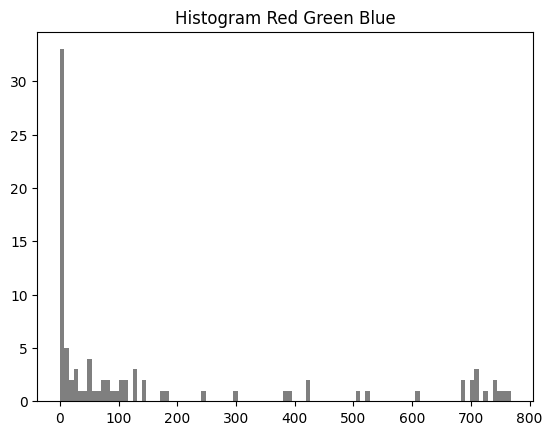

In [11]:
for x in range(0, 256):
    hgr[x] = 0 
    hgg[x] = 0 
    hgb[x] = 0 
    
for x in range(0, 768):
    hgrgb[x] = 0

# th = int(256/64)
temp = [0] # Inisialisasi list kosong temp
#Melakukan Looping
for y in range(0, img.shape[0]): 
    for x in range(0, img.shape[1]):
        #Mengmabil nilai & Warna
        red = int(img[y][x][0])
        green = int(img[y][x][1])
        blue = int(img[y][x][2]) 
        green = green + 256
        blue = blue + 512
#         temp.append(green)
        hgrgb[red] += 1 
        hgrgb[green] += 1
        hgrgb[blue] += 1
binsrgb = np.linspace(0, 768, 100) # Membuat 100 bin
plt.hist(hgrgb, binsrgb, color="black", alpha=0.5) # Membuat histogram 
# plt.plot(hgrgb)
plt.title("Histogram Red Green Blue") # Memberikan judul
plt.show() # Menampilkan

Menampilkan Histogram

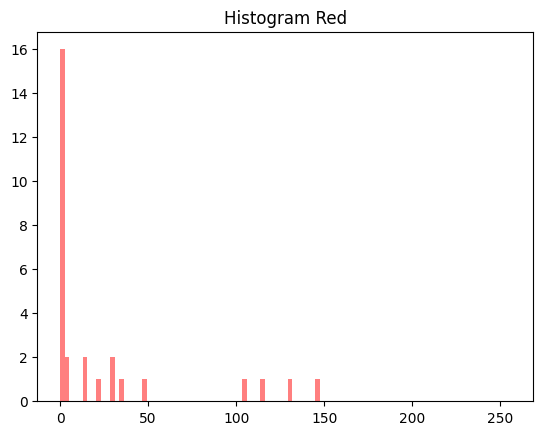

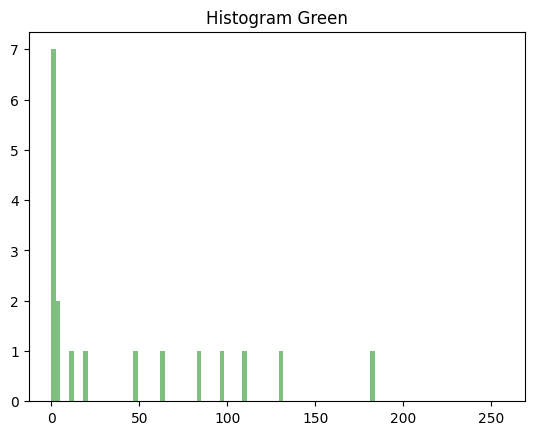

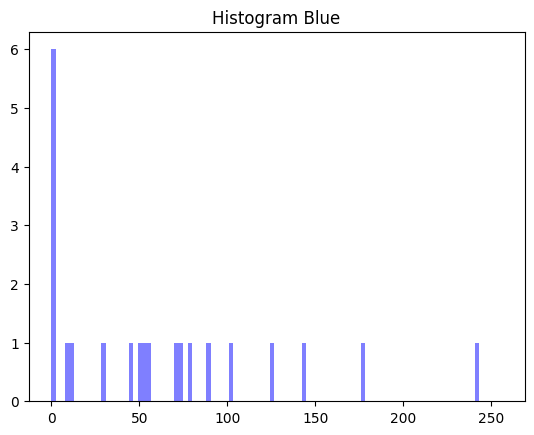

In [12]:
for y in range(0, img_height): 
    for x in range(0, img_width):
        red = img[y][x][0] 
        green = img[y][x][1] 
        blue = img[y][x][2] 
        hgr[red] += 1 
        hgg[green] += 1 
        hgb[blue] += 1

bins = np.linspace(0, 256, 100) 
plt.hist(hgr, bins, color="red", alpha=0.5) 
plt.title("Histogram Red") 
plt.show()
plt.hist(hgg, bins, color="green", alpha=0.5)
plt.title("Histogram Green") # judul
plt.show() # tampilkan plot histogram

plt.hist(hgb, bins, color="blue", alpha=0.5) # plot histogram untuk komponen biru 
plt.title("Histogram Blue") # judul plot histogram u
plt.show()  # tampilkan plot histogram

Menampilkan Histogram Kumulatif

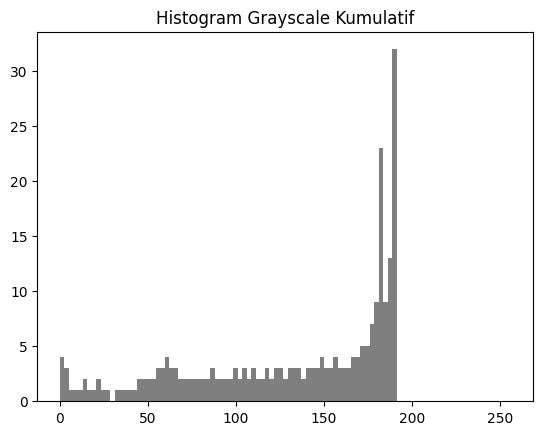

In [13]:
hgk = np.zeros((256)) 
c = np.zeros((256)) 

for x in range(0, 256): # loop sebanyak 256
    # set nilai elemen
    hgk[x] = 0 
    c[x] = 0

for y in range(0, img_height): # loop sebanyak tinggi gambar
    for x in range(0, img_width): # loop sebanyak lebar gambar
        gray = img_grayscale[y][x][0] # nilai piksel grayscale
        hgk[gray] += 1 
                
c[0] = hgk[0] # set nilai elemen 
for x in range(1, 256): # loop sebanyak 255
     c[x] = c[x-1] + hgk[x] # set nilai elemen ke-x 
hmaxk = c[255] # simpan nilai elemen ke-255
for x in range(0, 256): 
    c[x] = 190 * c[x] / hmaxk # set nilai elemen ke-x dari array c
plt.hist(c, bins, color="black", alpha=0.5) # plot histogram 
plt.title("Histogram Grayscale Kumulatif") # judul plot histogram
plt.show() # tampilkan plot histogram


Menampilkan Histogram Hequalisasi¶

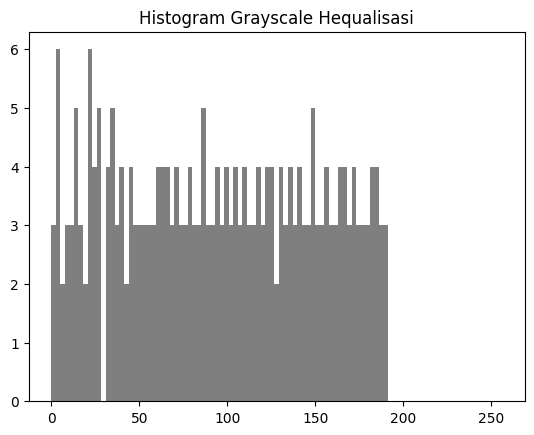

In [14]:
 # inisialisasi array
hgh = np.zeros((256))
h = np.zeros((256))
c = np.zeros((256))

 # loop
for x in range(0, 256):
    # set nilai elemen
    hgh[x] = 0 
    h[x] = 0 
    c[x] = 0
# loop
for y in range(0, img_height):
    for x in range(0, img_width):
        gray = img_grayscale[y][x][0] # nilai piksel grayscale
        hgh[gray] += 1 # tambahkan 1 ke elemen
                
h[0] = hgh[0] # set nilai
for x in range(1, 256): # loop sebanyak 255 elemen 
     h[x] = h[x-1] + hgh[x] # set nilai elemen ke-x dari array h

for x in range(0, 256): # loop sebanyak 256 elemen 
     h[x] = h[x] / img_height / img_width # set nilai elemen ke-x dari array h
for x in range(0, 256): # loop sebanyak 256 elemen 
    hgh[x] = 0 # set nilai elemen ke-x 
    
for y in range(0, img_height): # loop sebanyak tinggi gambar 
    for x in range(0, img_width): # loop sebanyak lebar gambar
        gray = img_grayscale[y][x][0] # nilai piksel grayscale
        gray = h[gray] * 255 # ubah nilai piksel grayscale menjadi nilai baru 
        hgh[int(gray)] += 1 # tambahkan 1 ke elemen

c[0] = hgh[0] # set nilai elemen ke-0 dari array c 
for x in range(1, 256): # loop sebanyak 255 elemen 
     c[x] = c[x-1] + hgh[x] # set nilai elemen ke-x 
hmaxk = c[255] # Mencari nilai elemen ke-255 dari array 'c' 
for x in range(0, 256): #  Melakukan loop 
    c[x] = 190 * c[x] / hmaxk # Melakukan normalisasi 
plt.hist(c, bins, color="black", alpha=0.5) # Membuat data yang telah di-normalisasi
plt.title("Histogram Grayscale Hequalisasi") # Memberikan judul
plt.show() # Menampilkan plot histogram